# TASK-1
**- Ankit Shah**

**Prediction using Supervised ML**

**Goal-**
Predict the percentage of an student based on the no. of study hours.

In this task, we predict the percentage score of the student based on the number of hours he/she studied by using the simple linear regression algorithm.

**Importing the required modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the data**

In [2]:
df = pd.read_csv('marks_data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Getting the data information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Describing the data**

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.shape

(25, 2)

**Checking the relation between Independent and Target Variable**

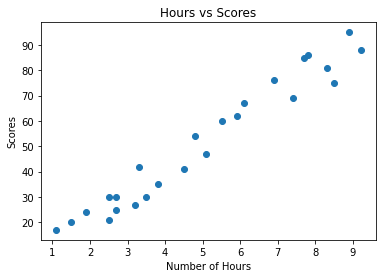

In [6]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

**Observation-**
We can clearly notice that Number of Hours studied is linearly related to the Scores of the student.

**Splitting the data into for training and testing**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['Hours'].values.reshape(-1,1), df['Scores'], test_size = 0.2, random_state = 42)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

**Training the Linear Regression Model**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Plotting the predicted Line**

In [12]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (df['Hours'].values * coefficient) + intercept

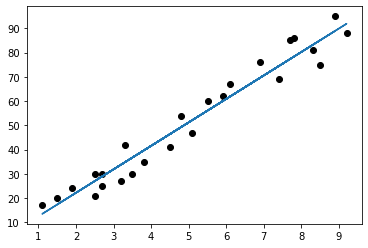

In [13]:
plt.scatter(df.Hours, df.Scores, color = 'black')
plt.plot(df.Hours, line)
plt.show()

In [14]:
pred = model.predict(X_test)
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

**Comparing Actual and Predicted Values**

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':pred})  
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


**Evaluating the Model**

In [16]:
from sklearn import metrics

In [17]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994


**What will be predicted score if a student study for 9.25 hrs in a day?**

In [18]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hrs in a day.")

92.38611528261494 will be predicted score if a student study for 9.25 hrs in a day.
